#TFM - Análisis de la evolución de noticias falsas en Twitter

##Fase 02 - Texto a Números

En esta fase trataremos de procesar el texto de los tweets y pasarlos por el modelo para adquirir los Embeddings. 
También trataremos de localizar el tweet más antiguo que hable de esta noticia falsa.


##Fuentes
###Sentence-BERT
- [Sentence Embeddings with BERT & XLNet](https://pythonrepo.com/repo/UKPLab-sentence-transformers-python-natural-language-processing)
- [Quickstart Sentence-BERT](https://www.sbert.net/docs/quickstart.html)
- [Pretrained Models](https://www.sbert.net/docs/pretrained_models.html)

###BERT Analisis Twitter
- [How I used Bidirectional Encoder Representations from Transformers (BERT) to Analyze Twitter Data](https://analyticsindiamag.com/how-i-used-bidirectional-encoder-representations-from-transformers-bert-to-analyze-twitter-data/)
- [Hands-On Guide to Download, Analyze and Visualize Twitter Data](https://analyticsindiamag.com/hands-on-guide-to-download-analyze-and-visualize-twitter-data/)
- [Guide To Pysentimiento Toolkit | Text Classification Using Transformers](https://analyticsindiamag.com/guide-to-pysentimiento-toolkit-text-classification-using-transformers)
- [Sentence Embeddings with BERT & XLNet](https://pythonrepo.com/repo/UKPLab-sentence-transformers-python-natural-language-processing)
- [Semantic Textual Similarity](https://www.sbert.net/docs/usage/semantic_textual_similarity.html)
- [Computing Sentence Embeddings](https://www.sbert.net/examples/applications/computing-embeddings/README.html)

###Sentence-bert model spanish texts
- [Multi-Lingual Models](https://www.sbert.net/docs/pretrained_models.html)
- [BETO: Spanish BERT](https://medium.com/dair-ai/beto-spanish-bert-420e4860d2c6)
- [BETO: Spanish BERT on GitHub](https://github.com/dccuchile/beto)

@inproceedings{CaneteCFP2020,
  title={Spanish Pre-Trained BERT Model and Evaluation Data},
  author={Cañete, José and Chaperon, Gabriel and Fuentes, Rodrigo and Ho, Jou-Hui and Kang, Hojin and Pérez, Jorge},
  booktitle={PML4DC at ICLR 2020},
  year={2020}
}

###Embedints (Incrustaciones de palabras)
- [El modelo Embeddings (Incrustaciones) de Palabras](https://unipython.com/el-modelo-embeddings-incrustaciones-de-palabras/)

###Calculo de distancias
- [scipy.spatial.distance.cosine](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html)
- [Cosine Similarity – Understanding the math and how it works (with python codes)](https://www.machinelearningplus.com/nlp/cosine-similarity/)
- [Document Similarity](https://shravan-kuchkula.github.io/document_similarity/#)
- [Semantic Textual Similarity](https://www.sbert.net/docs/usage/semantic_textual_similarity.html)

###CSV
- [CSV File Reading and Writing](https://docs.python.org/3/library/csv.html)

###Helps on development
- https://stackoverflow.com/questions/62710872/how-to-store-word-vector-embeddings
- https://stackoverflow.com/questions/66537949/convert-twitter-new-date-format-to-date-time-y-m-d-hms
- https://stackoverflow.com/questions/8200342/removing-duplicate-strings-from-a-list-in-python



In [ ]:
#################################################
# install the sentence-transformers
#################################################
#Required libs on installs
import datetime #Work with dates
import sys

if 'sentence-transformers' in sys.modules:
    print(f"{'sentence-transformers'!r} already in sys.modules")
else:
    # install the sentence-transformers
    !pip install -U sentence-transformers


print('\n\nInstalación realizada a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...')

     |████████████████████████████████| 78 kB 2.6 MB/s 
     |████████████████████████████████| 2.9 MB 37.3 MB/s 
     |████████████████████████████████| 3.3 MB 43.6 MB/s 
     |████████████████████████████████| 1.2 MB 20.0 MB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 
     |████████████████████████████████| 895 kB 55.8 MB/s 
     |████████████████████████████████| 596 kB 42.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=3ed5575952ee23a95102d1c69b9aebecf42d519c9a91cacd9b686506668cacd0
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Instalación realizada a las  25 Oct 2021 - 05:14:15 ...


In [ ]:
#################################################
# Importing Libraries
#################################################
# Importing Sentence Transformers Library to get model after
from sentence_transformers import SentenceTransformer, util

# Needed to create/load jsons file with tweets 
import json

# Numpy (here we go to use it for store/load embeddings on cloud)
import numpy as np

#google drive
from google.colab import drive

import os
import pandas as pd
import math

import importlib.util

from datetime import datetime as datetime_parser #Parse string dates
print('Librerias cargadas a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...')

Librerias cargadas a las  25 Oct 2021 - 05:16:15 ...


In [ ]:
######################################################
# Mount google drive and use folder of data
######################################################
drive.mount('/content/drive/')
BASE_FOLDER = '/content/drive/My Drive/Colab Notebooks/09_TFM/vacunas_grafeno/'



print('\nDRIVE montada a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...')

Mounted at /content/drive/

DRIVE montada a las  25 Oct 2021 - 05:17:26 ...


In [ ]:
#################################################################
# Method that replace and remove Unicode chars
#
# https://en.wikipedia.org/wiki/List_of_Unicode_characters
# https://apps.timwhitlock.info/emoji/tables/unicode
#################################################################
def UnicodeFilter(var):
    temp = var
    temp = temp.replace(chr(0x0015), "'")
    temp = temp.replace(chr(0x2026), "")
    temp = temp.replace(chr(0x2015), " ")

    # Remove emojis and all that shit
    for x in range(127381, 129305):
        temp = temp.replace(chr(x), "")
    return str(temp)
#end_def

#DEBUG code
##print(chr(0x0015))
##print(chr(0x2026))
##print(chr(0x2019)) 
##for x in range(127381, 129305):
##    print(chr(x))

print('Método creado a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...')

Método creado a las  25 Oct 2021 - 05:17:29 ...


In [ ]:
#################################################
# Method that makes a little processed of data in  
# order to get tweets text normalized for spanish 
# language
#
# TODO: can be improved
#################################################
def preprocess_tweets_text_v3(tweets_df):

    #Auxiliar dataframe
    aux_df = pd.DataFrame(columns=['tweet_id', 'created_at', 'text'])


    # Iterating the index
    for index, row in tweets_df.iterrows():
        try:
            ##print(row)

            ##the_text = tweets_df.loc[index, "text"]
            the_text = row.text
            proc_text = UnicodeFilter(the_text)
            ##print(proc_text)

            ##t_id = tweets_df.loc[index,'tweet_id']
            t_id = row.tweet_id
            ##print(t_id)

            ##when = tweets_df.loc[index,'created_at']
            when = row.created_at
            ##print(when)

            #Parse string date and convert to timestamp
            ##Mon Oct 04 00:34:33 +0000 2021
            when_ts = datetime_parser.strptime(when,'%a %b %d %H:%M:%S %z %Y')

            #Assign to new dataframe
            aux_df.loc[index] = [t_id, when_ts, proc_text]
        except Exception as e:
          msg = e
          print(msg)       
        #end_try      
    #end_for

    # get text list 
    sentences_processed_v2 = aux_df['text'].tolist()

    return aux_df, sentences_processed_v2
#end_def


print('Método creado a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...')


Método creado a las  25 Oct 2021 - 05:17:32 ...


In [ ]:
#################################################
# Method that load tweets from JSON and store its
# into the dataframe
#
# TODO: can be improved
#################################################
def load_tweets_from_json(json_for_load, process_jsons):

    if process_jsons:
        ###########################################
        # Load JSON Tweets in a DataFrame
        with open(json_for_load) as f:
            data = json.load(f)
            ##print(data)

        #Json to Dataframe
        df = pd.DataFrame.from_dict(data, orient='columns')
        full_tweets_frame = df[["id","created_at","full_text","retweet_count","favorite_count"]]

        #Rename some columns
        full_tweets_frame.rename(columns={'id': 'tweet_id', 'full_text': 'text'}, inplace=True)

        # Show first N rows
        ##selected_columns.head(15)
  

        print('\nDatos cargados desde JSONs '+json_for_load+' a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...')    

        return full_tweets_frame;
    else:
        print('\nNo working with data stored on JSONs')
    #end_if  
#end_method

In [ ]:
#################################################
# Tweets data load from JSONs on Dataframe
#################################################
if 'full_fn_dataframe' in globals():
  del full_fn_dataframe

if 'full_fn_dataframe2' in globals():
  del full_fn_dataframe2

if 'full_fn_dataframe3' in globals():
  del full_fn_dataframe3

if 'full_fn_dataframe4' in globals():
  del full_fn_dataframe4

###########################################
# Load tweets about vacunas
need2load_jsons = True
full_fn_dataframe = load_tweets_from_json(BASE_FOLDER+'20211023_tweets_vacunas.json', need2load_jsons)

###########################################
# Load actualidad/noticias/ciencia Tweets in a DataFrame
need2load_jsons = True
full_fn_dataframe2 = load_tweets_from_json(BASE_FOLDER+'20211023_tweets_actualidad.json', need2load_jsons)

###########################################
# Load tweets about covid 19
need2load_jsons = True
full_fn_dataframe3 = load_tweets_from_json(BASE_FOLDER+'20211023_tweets_covid-19.json', need2load_jsons)

###########################################
# Load tweets about vacunas con grafeno
need2load_jsons = True
full_fn_dataframe4 = load_tweets_from_json(BASE_FOLDER+'20211023_tweets_vacunas_grafeno.json', need2load_jsons)


display('Numero total de tweets en df0: '+str(len(full_fn_dataframe)))
display('Numero total de tweets en df1: '+str(len(full_fn_dataframe2)))
display('Numero total de tweets en df2 '+str(len(full_fn_dataframe3)))
display('Numero total de tweets en df3: '+str(len(full_fn_dataframe4)))

total = len(full_fn_dataframe) + len(full_fn_dataframe2) + len(full_fn_dataframe3)+ len(full_fn_dataframe4)
display('Numero total de tweets a tratar: '+str(total))

print('\nTodos los datos cargados desde JSONs a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...')    


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,



Datos cargados desde JSONs /content/drive/My Drive/Colab Notebooks/09_TFM/vacunas_grafeno/20211023_tweets_vacunas.json a las  25 Oct 2021 - 05:19:14 ...

Datos cargados desde JSONs /content/drive/My Drive/Colab Notebooks/09_TFM/vacunas_grafeno/20211023_tweets_actualidad.json a las  25 Oct 2021 - 05:19:15 ...

Datos cargados desde JSONs /content/drive/My Drive/Colab Notebooks/09_TFM/vacunas_grafeno/20211023_tweets_covid-19.json a las  25 Oct 2021 - 05:19:15 ...

Datos cargados desde JSONs /content/drive/My Drive/Colab Notebooks/09_TFM/vacunas_grafeno/20211023_tweets_vacunas_grafeno.json a las  25 Oct 2021 - 05:19:16 ...


'Numero total de tweets en df0: 4000'

'Numero total de tweets en df1: 4000'

'Numero total de tweets en df2 4000'

'Numero total de tweets en df3: 894'

'Numero total de tweets a tratar: 12894'


Todos los datos cargados desde JSONs a las  25 Oct 2021 - 05:19:16 ...


In [ ]:
####################################
# Merge all dataframes into one
####################################
if 'full_tweets_frame' in globals():
  del full_tweets_frame

full_tweets_frame = full_fn_dataframe.append(full_fn_dataframe2) ##pd.concat([full_cumvieja_tweets_frame,full_fn_dataframe])    
full_tweets_frame = full_tweets_frame.append(full_fn_dataframe3) ##pd.concat([full_cumvieja_tweets_frame,full_fn_dataframe])    
full_tweets_frame = full_tweets_frame.append(full_fn_dataframe4) ##pd.concat([full_cumvieja_tweets_frame,full_fn_dataframe])

display('Numero total de tweets en dataframe final: '+str(len(full_tweets_frame)))


#Remove previous dataframe in order to release memory and avoid problems
del full_fn_dataframe
del full_fn_dataframe2
del full_fn_dataframe3
del full_fn_dataframe4


print('\nDatos mezclados en un único JSONs a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...')   

'Numero total de tweets en dataframe final: 12894'


Datos mezclados en un único JSONs a las  25 Oct 2021 - 05:19:31 ...


In [ ]:
#################################################
# Review Dataframe tweets
#################################################
show_detailed_feedback = False

if show_detailed_feedback:
    full_tweets_frame.shape[0]
    full_tweets_frame[full_tweets_frame.columns[0]].count()
    display(full_tweets_frame.describe())
    display(full_tweets_frame.columns)


##full_tweets_frame.index.tolist()

In [ ]:
#################################################
# Tweets pre-procesing 1
#################################################

# PRE-PROCESS on own dataframe
# We add a column with tweet text char number
###full_tweets_frame['tweet_chars_number'] = full_tweets_frame['text'].str.len()

#REmoves duplicated tweets
drop_duplicates = True
if drop_duplicates:
  full_tweets_frame = full_tweets_frame.drop_duplicates(subset=['text'])
  display('Numero total de tweets tras eliminar repetidos: '+str(len(full_tweets_frame)))

# We add new column cosine score to the dataframe
###full_tweets_frame['cosine_scores'] = 0.0


# Show first N rows
###full_tweets_frame.head(15)

print('Tweets pre-procesing hecho a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...')    


'Numero total de tweets tras eliminar repetidos: 6678'

Tweets pre-procesing hecho a las  25 Oct 2021 - 05:19:44 ...


In [ ]:
if show_detailed_feedback:
    # Show first N rows
    ##display(full_tweets_frame.head(-15))
    ##display(full_tweets_frame.head(-15).index.tolist())

    display(full_tweets_frame.iloc[2,0])
    display(full_tweets_frame.iloc[2,1])
    display(full_tweets_frame.iloc[2,2])
    display(full_tweets_frame.iloc[2,3])
    display(full_tweets_frame.iloc[2,4])
    display(full_tweets_frame.iloc[2,5])

In [ ]:
#################################################
# Tweets pre-procesing 2
#################################################

if 'full_tweets_frame_processed' in globals():
  del full_tweets_frame_processed

if 'preproc_txt' in globals():
  del preproc_txt

# PRE-PROCESS text
full_tweets_frame_processed, preproc_txt = preprocess_tweets_text_v3(full_tweets_frame)


#Sort tweets by his creation date    
full_tweets_frame_processed.sort_values('created_at', ascending=False, inplace=True)

#Reset index
##full_tweets_frame_processed.reset_index(drop=True, inplace=True)
##full_tweets_frame_processed.set_index('tweet_id', inplace=True)
full_tweets_frame_processed.reset_index(drop=True, inplace=True)

full_tweets_frame_processed['cosine_scores'] = 0.0

#
print(len(preproc_txt))
print(preproc_txt)

print('Tweets pre-procesing hecho a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...')    


3573
['RT @RayliLujan: #ServicioPúblico Hoy me toca pedirles por los miembros de mi familia. Desde hace 15 días aproximadamente, presentamos sínto', 'RT @elespectador: (VIDEO) Rusia vuelve al encierro por la peor ola de Covid-19: 36.000 casos diarios. https://t.co/YPfciPK9le https://t.co/', 'RT @SecSaludVpar: Buenos días Valledupar⛅ \nSituación COVID-19 \nSábado  23 de octubre \nTotal casos: 61.334\nCasos 22 de octubre: 9\nCasos Act', 'RT @dnix_e: Falta poco para ser el primer país de Latinoamérica sin covid 19', 'RT @saludjalisco: Es momento de completar esquemas y protegerse  contra COVID-19. La convocatoria para segundas dosis ya está disponible, r', 'RT @hclaudiovicuna: Para prevenir el contagio del #Covid_19 debemos mantener todas las medidas de autocuidado que hemos aprendido\n- Usar ma', '@SciutoDr Los están llenando de grafeno, toxico al cuerpo humano.\nEstudios médicos internacionales informan, metales granulados en pacientes por las vacunas covid. Estos metales coagulan la sa

In [ ]:
#################################################
# Review Dataframe tweets
#################################################
show_detailed_feedback = False

display('Numero total de tweets: '+str(len(full_tweets_frame_processed)))

if show_detailed_feedback:
    full_tweets_frame_processed.shape[0]
    full_tweets_frame_processed[full_tweets_frame_processed.columns[0]].count()
    display(full_tweets_frame_processed.describe())
    display(full_tweets_frame_processed.columns)


##full_tweets_frame_processed.index.tolist()

print('Ejecutado a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...') 

'Numero total de tweets: 3573'

Ejecutado a las  25 Oct 2021 - 05:26:11 ...


In [ ]:
#################################################
# Review Dataframe tweets
#################################################
# Show first N rows
full_tweets_frame_processed.head(15)

,tweet_id,created_at,text,cosine_scores
0,1451939764135989250,2021-10-23 15:53:10+00:00,Volcán Etna tiene nueva erupción y provoca llu...,0.0
1,1451939739498684423,2021-10-23 15:53:04+00:00,RT @museodelamujer: 23 de octubre. Día Naciona...,0.0
2,1451939686142906368,2021-10-23 15:52:51+00:00,RT @MoreauLeopoldo: No solo estamos saliendo d...,0.0
3,1451939638474596353,2021-10-23 15:52:40+00:00,"RT @bbcmundo: En su natal Italia, las autorida...",0.0
4,1451939610636869636,2021-10-23 15:52:33+00:00,RT @juancortese: Buenas noticias en River: Fab...,0.0
5,1451939563698475015,2021-10-23 15:52:22+00:00,Bolsonaro liberal de la primera hora \n\nhttps...,0.0
6,1451939539602313222,2021-10-23 15:52:16+00:00,RT @ITFASpain: #Noticias | Autonómicas\n\n️| E...,0.0
7,1451939506224078856,2021-10-23 15:52:08+00:00,RT @MReboola: @_elfaro_ @apeselsalvador como q...,0.0
8,1451939491602739204,2021-10-23 15:52:05+00:00,RT @PartidoPSUV: Plasencia: Exigimos auditoría...,0.0
9,1451939470907887620,2021-10-23 15:52:00+00:00,Ya hay escasez de alimentos y combustible en v...,0.0


In [ ]:
#################################################
# Review Dataframe tweets
#################################################
# Show last N rows
full_tweets_frame_processed.iloc[-15:]


,tweet_id,created_at,text,cosine_scores
3558,1448932345810128901,2021-10-15 08:42:45+00:00,@y_privilegiado @1968zoltan No. Tu dices que l...,0.0
3559,1448926737643999239,2021-10-15 08:20:28+00:00,@y_privilegiado @1968zoltan Plásmido de grafen...,0.0
3560,1448925677294694404,2021-10-15 08:16:15+00:00,@montllo @1968zoltan El protector en este caso...,0.0
3561,1448925258455650310,2021-10-15 08:14:36+00:00,@PandemiaSi @Ricardo93334602 @inbotre Llámale ...,0.0
3562,1448924753025277956,2021-10-15 08:12:35+00:00,"@JvmVega @conbdebemoles Ah, es verdad, que las...",0.0
3563,1448889114225434659,2021-10-15 05:50:58+00:00,@Marbas1984 No sé... tal vez el grafeno y las ...,0.0
3564,1448879903512879145,2021-10-15 05:14:22+00:00,"@IreneMontero Habl del mejor futuro para,las n...",0.0
3565,1448876986106011653,2021-10-15 05:02:46+00:00,RT @Esmije20: Entre tantos Rumores el que mas ...,0.0
3566,1448875264851730442,2021-10-15 04:55:56+00:00,RT @jgsp12071979: @JoseMariaJimne6 El Dr. Fran...,0.0
3567,1448852765418139688,2021-10-15 03:26:32+00:00,"@DiarioLibre No, no son antivacunas. Ese es el...",0.0


##Fase 03 - Cálculo de distancias

En esta fase trataremos de utilizar los embeddings almacenados para calcular las similitud entre los textos de los tweets utilizando la distancia por coseno.


###Distancia Coseno

Un enfoque comúnmente utilizado para hacer coincidir documentos similares se basa en contar el número máximo de palabras comunes entre los documentos, enfoque a todas luces defectuoso, ya que a medida que aumenta el tamaño del documento, la cantidad de palabras comunes tiende a aumentar incluso si los documentos hablan de diferentes temas.

In [ ]:
#################################################
# Using Sentence Transformers
#################################################

# TODO: try to use BETO 
# https://medium.com/dair-ai/beto-spanish-bert-420e4860d2c6
# https://github.com/dccuchile/beto

#load model
##model = SentenceTransformer('paraphrase-distilroberta-base-v1')
##model = SentenceTransformer('all-MiniLM-L6-v2')
model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

#Change the length to 400
model.max_seq_length = 400

print('Model cargado a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...')    


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.77k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/723 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/402 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model cargado a las  25 Oct 2021 - 05:27:28 ...


In [ ]:
#################################################
# Get by hand the selected fake news tweet
# and localize it in the dataframe, only for laugh
#################################################
my_selected_tweet_full = 'Plan de reducci\u00f3n de la poblaci\u00f3n a trav\u00e9s de intubaci\u00f3n en los hospitales y las vacunas de grafeno'


# Find the selected fake news between all tweet sand get 
# index of the selected tweet in the dataframe
##full_tweets_frame_processed.iloc[2,0]
the_index = full_tweets_frame_processed.loc[full_tweets_frame_processed[:]['text'].str.contains(my_selected_tweet_full, case=False)].index.values[0]
print('Index of tweet: '+str(the_index))
rowData = full_tweets_frame_processed.loc[the_index,:]
print(rowData)

print('Tweet objetivo seleccionado a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...')

Index of tweet: 3316
tweet_id                                       1450851551900323843
created_at                               2021-10-20 15:49:00+00:00
text             RT @vozproletariada: Plan de reducción de la p...
cosine_scores                                                    0
Name: 3316, dtype: object
Tweet objetivo seleccionado a las  25 Oct 2021 - 05:33:24 ...


In [ ]:
################################################################
#
################################################################
def compute_score(tweets_dataframe_param, current_target_text):
    
    tweets_dataframe = tweets_dataframe_param.copy()
    i_less_one_tweet = ''
    only_fakes_threshold = 0.5

    print('start at', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...')

    #################################################
    #Tweet objetivo VS el resto
    #1- Calculas la distancia del tweet objetivo con el resto
    #1.2- De ese cálculo te quedas con los que tengan una similaridad por encima del threshold que tienes y seleccionas el más reciente. 
    #2- Este nuevo lo añades a la secuencia 
    #3- vuelves a empezar el proceso tomando el último añadido como tweet objetivo (Vuelta paso 1)
    for index, row in tweets_dataframe.iterrows():
        i_less_one_tweet = row.text
        ###print(i_less_one_tweet)
        ###print(index)

        #TODO:calc score between tweets
        #Generate embedding
        i_target_tweet_embedding = model.encode(current_target_text)
        i_less_one_embedding = model.encode(i_less_one_tweet)

        #score calc
        cosine_scores_1 = util.pytorch_cos_sim(i_target_tweet_embedding, i_less_one_embedding)

        #Assign the new value
        tweets_dataframe.loc[index, "cosine_scores"] = float(cosine_scores_1[0][0])

        #if tweets_dataframe.loc[index, "cosine_scores"] > only_fakes_threshold:
        #  tweets_dataframe.loc[index, 'Stance'] = 'FAVOR'

        if (index % 50) == 0:
          print(str(index)+' items processed at', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...')

    #end_for

    print('end at', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...')

	  #Copy dataframe sorted by score
    #df_aux = tweets_dataframe.sort_values('cosine_scores', ascending=False, inplace=False)
    df_aux = tweets_dataframe.copy();
    #df_aux = tweets_dataframe.loc[tweets_dataframe['cosine_scores'] > only_fakes_threshold]

    return df_aux
#end_method


print('Método creado a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...')


Método creado a las  25 Oct 2021 - 06:05:16 ...


In [ ]:
#################################################
# Paso 1 
#Tweet objetivo VS el resto
#1- Calculas la distancia del tweet objetivo con el resto
#1.2- De ese cálculo te quedas con los que tengan una similaridad por encima del threshold que tienes 
#1.3- seleccionas el más reciente. 
#2- Este nuevo lo añades a la secuencia 
#3- vuelves a empezar el proceso tomando el último añadido como tweet objetivo (Vuelta paso 1)
###if 'local_df_aux' in globals():
###  del local_df_aux

local_df_aux = compute_score(full_tweets_frame_processed,my_selected_tweet_full)
display(local_df_aux)


In [ ]:
# saving as a CSV file
local_df_aux.to_csv(BASE_FOLDER+'20211025_VacGrafebi_processed.txt', sep ='\t')

In [ ]:
# Paso 2
del local_df_final


only_fakes_threshold = 0.5

#Pillamos los de el score mayor que:
local_df_aux_2 = local_df_aux.loc[local_df_aux['cosine_scores'] > only_fakes_threshold]
local_df_aux_2 = local_df_aux_2.replace('\n',' ', regex=True)
print('\nPor encima del umbral: '+str(len(local_df_aux_2)))


my_selected_tweet_full_2 = my_selected_tweet_full.replace('\n',' ')
print('\nTweet objetivo: '+my_selected_tweet_full_2)


while not local_df_aux_2.empty:

    #Pillamos la row del tweet objetivo
    try:
        the_index = local_df_aux_2.loc[local_df_aux_2[:]['text'].str.contains(my_selected_tweet_full_2, case=False)].index.values[0]
        print('Index of tweet: '+str(the_index))
        rowData = local_df_aux_2.loc[the_index,:]
        print(rowData)
    except:
        rowData = local_df_aux_2.iloc[0,:]
    #end_try

    #inserto el tweet objetivo en el dataframe
    if 'local_df_final' not in globals() or local_df_final.empty:
      print('create')
      local_df_final = local_df_aux_2[local_df_aux_2.created_at == rowData.created_at]
    else:
      print('append')
      local_df_final = local_df_final.append(local_df_aux_2[local_df_aux_2.created_at == rowData.created_at])
    #end if

    #Pillo los tweet por debajo de la fecha del objetivo
    local_df_aux_2 = local_df_aux_2[local_df_aux_2.created_at < rowData.created_at]
    ##print('rowData.tweet_id: '+str(rowData.tweet_id))
    ##local_df_aux_2 = local_df_aux_2[local_df_aux_2.tweet_id != rowData.tweet_id]
    print('Items a procesar: '+str(len(local_df_aux_2)))

    # Paso 3
    if not local_df_aux_2.empty:
      # Pillo el nuevo texto más actual
      my_selected_tweet_full_2 = local_df_aux_2.iloc[0,2]# Pillo en nuevo texto más actual
      print('\nTweet objetivo: '+my_selected_tweet_full_2)

      local_df_aux_2 = compute_score(local_df_aux_2,my_selected_tweet_full_2)
      ###display(local_df_aux_2)
    #end if
#end_while  



Por encima del umbral: 164

Tweet objetivo: Plan de reducción de la población a través de intubación en los hospitales y las vacunas de grafeno
Index of tweet: 3316
tweet_id                                       1450851551900323843
created_at                               2021-10-20 15:49:00+00:00
text             RT @vozproletariada: Plan de reducción de la p...
cosine_scores                                             0.895579
Name: 3316, dtype: object
create
Items a procesar: 43

Tweet objetivo: Plan de reducción de la población a través de intubación en los hospitales y las vacunas de grafeno https://t.co/H1urf3GbS6
start at 25 Oct 2021 - 07:06:55 ...
3500 items processed at 25 Oct 2021 - 07:07:08 ...
end at 25 Oct 2021 - 07:07:14 ...
Index of tweet: 3317
tweet_id                                       1450851439350276098
created_at                               2021-10-20 15:48:33+00:00
text             Plan de reducción de la población a través de ...
cosine_scores               

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


3500 items processed at 25 Oct 2021 - 07:09:32 ...
end at 25 Oct 2021 - 07:09:38 ...
Index of tweet: 3349
tweet_id                                       1450558994729275392
created_at                               2021-10-19 20:26:29+00:00
text             @Newtral Te intoxicación el sistema las vacuna...
cosine_scores                                                    1
Name: 3349, dtype: object
append
Items a procesar: 35

Tweet objetivo: @vinyes71 @DoctorSITHo No lo se. El grafeno o el GO puede usarse en biomedicina con fines beneficiosos pero han censurado y bloqueado a la gente que hablaba de ello, así que es lógico pensar que, con estas vacunas, no lleva un buen fin 
start at 25 Oct 2021 - 07:09:38 ...
3500 items processed at 25 Oct 2021 - 07:09:50 ...
end at 25 Oct 2021 - 07:09:57 ...
Index of tweet: 3355
tweet_id                                       1450540000978870278
created_at                               2021-10-19 19:11:00+00:00
text             @vinyes71 @DoctorSITHo No

In [ ]:
# saving as a CSV file
local_df_aux.to_csv(BASE_FOLDER+'20211025_VacGrafebi_processed2.txt', sep ='\t')

In [ ]:
print(len(local_df_final))
local_df_final

In [ ]:
print(len(local_df_aux_2))

local_df_aux_2

In [ ]:
if 'treelib' in sys.modules:
    print(f"{'treelib'!r} already in sys.modules")
else:
  !pip install treelib

from treelib import Node, Tree

  Created wheel for treelib: filename=treelib-1.6.1-py3-none-any.whl size=18386 sha256=4a04ea56cf5870e943bbf9ed301e678e73b430cf35a87f795119dbcad13ed2fd
  Stored in directory: /root/.cache/pip/wheels/89/be/94/2c6d949ce599d1443426d83ba4dc93cd35c0f4638260930a53
Successfully built treelib


In [ ]:
######################################################
# Temporal line generation...
######################################################

########################################
# Draw the timeline....
#Init tree to create temporally line
tree = Tree()

# Add text of target tweet as root node
the_parent = 'root'
root_txt = 'Notica Falsa de partida: ' + my_selected_tweet_full.replace('\n','') #added text
tree.create_node(root_txt, the_parent)  


how_many_tabs = 0
for index, row in local_df_final.iterrows():
    t_id_aux = row['tweet_id']
    created_at_aux = row['created_at']
    cosine_scores_aux = row['cosine_scores']
    ori_txt_aux = row['text']

    #
    how_many_tabs += 1
    tabs = ''
    for i in range(how_many_tabs):
      tabs += '    '
    #end_for

    #tree branch
    try:
      #the text
      full_txt_aux = 'Fecha Tweet: ' + str(created_at_aux) 
      full_txt_aux += '\n' + tabs + 'ID Tweet: ' + str(t_id_aux)
      full_txt_aux += '\n' + tabs + 'Distancia semántica: ' + str(cosine_scores_aux)


      full_txt_aux += '\n' + tabs + str(ori_txt_aux)
      full_txt_aux += '\n' + tabs + '│'
      #create branch
      tree.create_node(full_txt_aux, t_id_aux, parent=the_parent)
      the_parent = t_id_aux
    except Exception as e:
      #print(e)  
      msg = 'Nothing to do'
    #end_try      
#end_for


tree.show()


print('Linea Temporal generada a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...') 

Notica Falsa de partida: Plan de reducción de la población a través de intubación en los hospitales y las vacunas de grafeno
└── Fecha Tweet: 2021-10-20 15:49:00+00:00
    ID Tweet: 1450851551900323843
    Distancia semántica: 0.8955789804458618
    RT @vozproletariada: Plan de reducción de la población a través de intubación en los hospitales y las vacunas de grafeno https://t.co/H1urf
    │
    └── Fecha Tweet: 2021-10-20 15:48:33+00:00
        ID Tweet: 1450851439350276098
        Distancia semántica: 1.0
        Plan de reducción de la población a través de intubación en los hospitales y las vacunas de grafeno https://t.co/H1urf3GbS6
        │
        └── Fecha Tweet: 2021-10-20 15:39:54+00:00
            ID Tweet: 1450849262124797956
            Distancia semántica: 0.9999995231628418
            Pueblo despierta que están llevando a cabo una agenda para reducir la población, las vacunas tienen grafeno y en los hospitales les secan los pulmones a los que lleguen sin oxígeno, SALVA

#TFM - Análisis de la evolución de noticias falsas en Twitter

##Fase 04 - Cálculo de Sentimientos

En esta fase trataremos de establecer una relación entre los sentimientos de los tweets


###Fuentes
- [pysentimiento en GitHub](https://github.com/pysentimiento/pysentimiento)
- [Sentiment Analysis using VADER](https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/)
- [Análisis de Sentimientos sobre Twitter usando la librería TextBlob de Python](https://blog.hacemoscontactos.com/2018/07/28/analisis-de-sentimientos-sobre-twitter-usando-la-libreria-textblob-de-python/)

In [ ]:
##import sys

######################################################### 
# Install Pysentimiento
#########################################################
if 'pysentimiento' in sys.modules:
    print(f"{'treelib'!r} already in sys.modules")
else:
  !pip install pysentimiento
  print('\nInstalación hecha a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...') 

     |████████████████████████████████| 290 kB 5.1 MB/s 
     |████████████████████████████████| 170 kB 59.5 MB/s 
     |████████████████████████████████| 1.3 MB 45.9 MB/s 
     |████████████████████████████████| 125 kB 59.5 MB/s 
     |████████████████████████████████| 243 kB 44.7 MB/s 
     |████████████████████████████████| 160 kB 59.8 MB/s 
     |████████████████████████████████| 271 kB 66.9 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=01ca04d840982fbbf2ed988f8010d5ff32c83cd4ce8781710e2f20ab903e6d53
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji

Instalación hecha a las  25 Oct 2021 - 07:23:31 ...


In [ ]:
######################################################### 
# Import PySentimiento and using SentimentAnalyzer 
# for Spanish language, to analyze sentiments
#########################################################

from pysentimiento import SentimentAnalyzer
sentiment_analyzer_es = SentimentAnalyzer(lang="es")


print('\nLibrerias cargadas a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...') 

Downloading:   0%|          | 0.00/528 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/841 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/236k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/469k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/419M [00:00<?, ?B/s]


Librerias cargadas a las  25 Oct 2021 - 07:25:09 ...


In [ ]:
######################################################### 
# Import PySentimiento and using EmotionAnalyzer 
# for Spanish language, to analyze emotions
#########################################################

from pysentimiento import EmotionAnalyzer
emotion_analyzer_es = EmotionAnalyzer(lang="es")


print('\nLibrerias cargadas a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...') 

https://huggingface.co/finiteautomata/beto-emotion-analysis/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpftk0bc1n


Downloading:   0%|          | 0.00/528 [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/beto-emotion-analysis/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/b515a7f7f7c5ab818cb49fe535d9886b05f726253b73e8233fba3b1eb1d9dda9.6610639a3a01ef41e1083c8f282f39d442a64ca8691291be4444213bf598269d
creating metadata file for /root/.cache/huggingface/transformers/b515a7f7f7c5ab818cb49fe535d9886b05f726253b73e8233fba3b1eb1d9dda9.6610639a3a01ef41e1083c8f282f39d442a64ca8691291be4444213bf598269d
https://huggingface.co/finiteautomata/beto-emotion-analysis/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmphce3e2up


Downloading:   0%|          | 0.00/950 [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/beto-emotion-analysis/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/b75b62ad64772a1df4c46943b8729e726a8bcc147e845197d591ebde2d1430b2.516dbdb8064a2498055e9af6e5d92ae5a4583bcefe0ca71535c71f42cf513138
creating metadata file for /root/.cache/huggingface/transformers/b75b62ad64772a1df4c46943b8729e726a8bcc147e845197d591ebde2d1430b2.516dbdb8064a2498055e9af6e5d92ae5a4583bcefe0ca71535c71f42cf513138
loading configuration file https://huggingface.co/finiteautomata/beto-emotion-analysis/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/b75b62ad64772a1df4c46943b8729e726a8bcc147e845197d591ebde2d1430b2.516dbdb8064a2498055e9af6e5d92ae5a4583bcefe0ca71535c71f42cf513138
Model config BertConfig {
  "_name_or_path": "dccuchile/bert-base-spanish-wwm-cased",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpoin

Downloading:   0%|          | 0.00/236k [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/beto-emotion-analysis/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/182e659b57f089303d9beba9b54d4bbc33e388ea869b153a83344146934df088.6587bde86239957281af55b2f7e564df111a2b4f9dfc0ad884f13ea7106e4dfb
creating metadata file for /root/.cache/huggingface/transformers/182e659b57f089303d9beba9b54d4bbc33e388ea869b153a83344146934df088.6587bde86239957281af55b2f7e564df111a2b4f9dfc0ad884f13ea7106e4dfb
https://huggingface.co/finiteautomata/beto-emotion-analysis/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpz9d0so0_


Downloading:   0%|          | 0.00/469k [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/beto-emotion-analysis/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/d3ec1c07c1293a1f9a278e349641eff4ee1317eadc6625e7f0d740aed9d0c3e6.7bb78e6bcd16fd5afcc81f874d642c4c0e37c5a70d9c4cae22a5ef652a474211
creating metadata file for /root/.cache/huggingface/transformers/d3ec1c07c1293a1f9a278e349641eff4ee1317eadc6625e7f0d740aed9d0c3e6.7bb78e6bcd16fd5afcc81f874d642c4c0e37c5a70d9c4cae22a5ef652a474211
https://huggingface.co/finiteautomata/beto-emotion-analysis/resolve/main/added_tokens.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpfifp_4a6


Downloading:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/beto-emotion-analysis/resolve/main/added_tokens.json in cache at /root/.cache/huggingface/transformers/17175619af4cf779d700ee7d96d939b4a2e370552f3e212b28706988c07bc757.3bdabf8f0209d2860f770add80e3711ab238cbb392a68cc562df9a4f94237507
creating metadata file for /root/.cache/huggingface/transformers/17175619af4cf779d700ee7d96d939b4a2e370552f3e212b28706988c07bc757.3bdabf8f0209d2860f770add80e3711ab238cbb392a68cc562df9a4f94237507
https://huggingface.co/finiteautomata/beto-emotion-analysis/resolve/main/special_tokens_map.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp7qwapvfq


Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/beto-emotion-analysis/resolve/main/special_tokens_map.json in cache at /root/.cache/huggingface/transformers/1b11459e7e69246d319a1fdec54171a4b3b1420078955aa63daebe50a0639ac5.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d
creating metadata file for /root/.cache/huggingface/transformers/1b11459e7e69246d319a1fdec54171a4b3b1420078955aa63daebe50a0639ac5.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d
loading file https://huggingface.co/finiteautomata/beto-emotion-analysis/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/182e659b57f089303d9beba9b54d4bbc33e388ea869b153a83344146934df088.6587bde86239957281af55b2f7e564df111a2b4f9dfc0ad884f13ea7106e4dfb
loading file https://huggingface.co/finiteautomata/beto-emotion-analysis/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/d3ec1c07c1293a1f9a278e349641eff4ee1317eadc6625e7f0d740aed9d0c3e6.7bb78e6bcd16fd5afcc81f87

Downloading:   0%|          | 0.00/419M [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/beto-emotion-analysis/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/3340fd56aeb259af2588d2310cd2b65003da73c71a0b3a9b194261e0f6f7a947.3ee7c714ba16bbcb5520130b897e21deeef4b8547c73faea6878ea623d25bc6a
creating metadata file for /root/.cache/huggingface/transformers/3340fd56aeb259af2588d2310cd2b65003da73c71a0b3a9b194261e0f6f7a947.3ee7c714ba16bbcb5520130b897e21deeef4b8547c73faea6878ea623d25bc6a
loading weights file https://huggingface.co/finiteautomata/beto-emotion-analysis/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/3340fd56aeb259af2588d2310cd2b65003da73c71a0b3a9b194261e0f6f7a947.3ee7c714ba16bbcb5520130b897e21deeef4b8547c73faea6878ea623d25bc6a
All model checkpoint weights were used when initializing BertForSequenceClassification.

All the weights of BertForSequenceClassification were initialized from the model checkpoint at finiteautomata/beto-emotion-analysis.
If your ta


Librerias cargadas a las  25 Oct 2021 - 07:28:03 ...


In [ ]:
######################################################### 
# Method that give us the data about sentiments 
#########################################################
def get_sentiments_data(target_tweet_sentiment_output):

    predominand_sentiment_per = 0.0
    index1 = str(target_tweet_sentiment_output).find('output=') + len('output=')
    ##print(index1)
    predominand_sentiment = str(target_tweet_sentiment_output)[index1:index1+3]
    ##print(predominand_sentiment)

    indexNeg = str(target_tweet_sentiment_output).find('NEG: ') + len('NEG: ')
    ##print(indexNeg)
    s_sentiment_percent_neg = str(target_tweet_sentiment_output)[indexNeg:indexNeg+5]
    ##print(s_sentiment_percent_neg)

    indexNeu = str(target_tweet_sentiment_output).find('NEU: ') + len('NEU: ')
    ##print(indexNeu)
    s_sentiment_percent_neu = str(target_tweet_sentiment_output)[indexNeu:indexNeu+5]
    ##print(s_sentiment_percent_neu)

    indexPos = str(target_tweet_sentiment_output).find('POS: ') + len('POS: ')
    ##print(indexPos)
    s_sentiment_percent_pos = str(target_tweet_sentiment_output)[indexPos:indexPos+5]
    ##print(s_sentiment_percent_pos)

    if predominand_sentiment == 'NEG':
            predominand_sentiment_per = float(s_sentiment_percent_neg)
    elif predominand_sentiment == 'NEU':
            predominand_sentiment_per = float(s_sentiment_percent_neu)
    elif predominand_sentiment == 'POS':       
            predominand_sentiment_per = float(s_sentiment_percent_pos)
  
    return predominand_sentiment, predominand_sentiment_per, float(s_sentiment_percent_neg), float(s_sentiment_percent_neu), float(s_sentiment_percent_pos)



print('\nMetodo creado a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...')


Metodo creado a las  25 Oct 2021 - 07:28:08 ...


In [ ]:
######################################################### 
# Method that give us the data about sentiments 
#########################################################
def get_emotion_data(target_tweet_emotion_output):

    predominand_emotion_per = 0.0
    index1 = str(target_tweet_emotion_output).find('output=') + len('output=')
    ##print(index1)
    s_kind_of_sentiment = str(target_tweet_emotion_output)[index1:index1+3]
    ##print(s_kind_of_sentiment)

    indexFear = str(target_tweet_emotion_output).find('fear: ') + len('fear: ')
    ##print(indexFear)
    s_percent_fear = str(target_tweet_emotion_output)[indexFear:indexFear+5]
    ##print('fear: '+s_percent_fear)

    indexOthr = str(target_tweet_emotion_output).find('others: ') + len('others: ')
    ##print(indexOthr)
    s_percent_others = str(target_tweet_emotion_output)[indexOthr:indexOthr+5]
    ##print('others: '+s_percent_others)

    indexSad = str(target_tweet_emotion_output).find('sadness: ') + len('sadness: ')
    ##print(indexSad)
    s_percent_sadness = str(target_tweet_emotion_output)[indexSad:indexSad+5]
    ##print('sadness: '+s_percent_sadness)

    indexSur = str(target_tweet_emotion_output).find('surprise: ') + len('surprise: ')
    ##print(indexSur)
    s_percent_surprise = str(target_tweet_emotion_output)[indexSur:indexSur+5]
    ##print('surprise: '+s_percent_surprise)
    
    indexAng = str(target_tweet_emotion_output).find('anger: ') + len('anger: ')
    ##print(indexAng)
    s_percent_anger = str(target_tweet_emotion_output)[indexAng:indexAng+5]
    ##print('anger: '+s_percent_anger)
    
    indexDis = str(target_tweet_emotion_output).find('disgust: ') + len('disgust: ')
    ##print(indexDis)
    s_percent_disgust = str(target_tweet_emotion_output)[indexDis:indexDis+5]
    ##print('disgust: '+s_percent_disgust)
    
    indexJoy = str(target_tweet_emotion_output).find('joy: ') + len('joy: ')
    ##print(indexJoy)
    s_percent_joy = str(target_tweet_emotion_output)[indexJoy:indexJoy+5]
    ##print('joy: '+s_percent_joy)
    

    if s_kind_of_sentiment == 'fea':
            predominand_emotion_per = float(s_percent_fear)
    elif s_kind_of_sentiment == 'oth':
            predominand_emotion_per = float(s_percent_others)
    elif s_kind_of_sentiment == 'sad':       
            predominand_emotion_per = float(s_percent_sadness)
    elif s_kind_of_sentiment == 'sur':
            predominand_emotion_per = float(s_percent_surprise)
    elif s_kind_of_sentiment == 'ang':
            predominand_emotion_per = float(s_percent_anger)
    elif s_kind_of_sentiment == 'dis':       
            predominand_emotion_per = float(s_percent_disgust)
    elif s_kind_of_sentiment == 'joy':       
            predominand_emotion_per = float(s_percent_joy)


    return s_kind_of_sentiment, predominand_emotion_per, float(s_percent_fear), float(s_percent_others), float(s_percent_sadness), float(s_percent_surprise), float(s_percent_anger), float(s_percent_disgust), float(s_percent_joy)


print('\nMetodo creado a las ', datetime.datetime.now().strftime("%d %b %Y - %H:%M:%S"),'...')    


Metodo creado a las  25 Oct 2021 - 07:28:11 ...


In [ ]:
######################################################### 
# Temporal line generation with sentiments and emotions
######################################################### 

##if 'aux_df' in globals():
##  del aux_df
  
# Load processed fake news file of previous dataframe  
##aux_df = pd.read_csv(BASE_FOLDER+'20211008_tweets_fakesSorted.txt')


#target tweet
my_selected_tweet_full = 'Plan de reducci\u00f3n de la poblaci\u00f3n a trav\u00e9s de intubaci\u00f3n en los hospitales y las vacunas de grafeno'

########################################
# Sentiment analysis
sentiments_counter = { 'Negativo': 0, 'Positivo': 0, 'Neutro': 0 }
sentiments_es = { 'NEG': 'Negativo', 'POS': 'Positivo', 'NEU': 'Neutro' }
neg_sentiment_threshold = 0.7#Sentiment threshold

#Calc predominant sentiment for target tweet
target_tweet_sentiment_output = sentiment_analyzer_es.predict(my_selected_tweet_full.replace('\n',''))
##print(str(target_tweet_sentiment_output))
target_tweet_main_sentiment, target_predominand_sent, target_neg_per, target_neu_per, target_pos_per = get_sentiments_data(target_tweet_sentiment_output)
##print(target_tweet_main_sentiment + ' - '+ str(target_neg_per) + ' - '+ str(target_neu_per) + ' - '+ str(target_pos_per))

########################################
# Emotion analysis
emotions_counter = { 'Miedo': 0, 'Otras emociones': 0, 'Tristeza': 0, 'Sorpresa': 0, 'Enfado': 0, 'Disgusto': 0, 'Alegria': 0 }
emotions_es = { 'fea': 'Miedo', 'oth': 'Otras emociones', 'sad': 'Tristeza', 'sur': 'Sorpresa', 'ang': 'Enfado', 'dis': 'Disgusto', 'joy': 'Alegria' }
neg_sentiment_threshold = 0.7#Emotion threshold

#Calc predominant emotion for target tweet
target_tweet_emotion_output = emotion_analyzer_es.predict(my_selected_tweet_full.replace('\n',''))
##print(str(target_tweet_emotion_output))
target_tweet_main_emotion, target_predominand_emot, target_s_emotion_percent_fear, target_s_sentiment_percent_others, target_s_sentiment_percent_sadness, target_s_sentiment_percent_surprise, target_s_sentiment_percent_anger, target_s_sentiment_percent_disgust, target_s_sentiment_percent_joy = get_emotion_data(target_tweet_emotion_output)
##print(target_tweet_main_emotion + ' - fear: '+ str(target_s_emotion_percent_fear) + ' - sadness: '+ str(target_s_sentiment_percent_sadness) + ' - surprise: '+ str(target_s_sentiment_percent_surprise) + ' - anger: '+ str(target_s_sentiment_percent_anger) + ' - disgust: '+ str(target_s_sentiment_percent_disgust) + ' - joy: '+ str(target_s_sentiment_percent_joy)+ ' - others: '+ str(target_s_sentiment_percent_others))

########################################
# Draw the timeline....
#Init tree to create temporally line
tree = Tree()

# Add text of target tweet as root node
the_parent = 'root'
root_txt = 'Notica Falsa de partida: ' + my_selected_tweet_full.replace('\n','') #added text

my_target_sentiment = sentiments_es[target_tweet_main_sentiment]
root_txt += '\n' + 'Sentimiento predominante: ' + my_target_sentiment + ':' + str(target_predominand_sent)

my_target_emotion = emotions_es[target_tweet_main_emotion]
root_txt += '\n' + 'Emoción predominante: ' + my_target_emotion + ':' + str(target_predominand_emot)
tree.create_node(root_txt, the_parent)  

how_many_tabs = 0
for index, row in local_df_final.iterrows():
    t_id_aux = row['tweet_id']
    created_at_aux = row['created_at']
    cosine_scores_aux = row['cosine_scores']
    ori_txt_aux = row['text']

    ####################################
    #Sentiment analysis
    tweet_sentiment_output = sentiment_analyzer_es.predict(ori_txt_aux)
    tweet_main_sentiment, predominand_sent, neg_per, neu_per, pos_per = get_sentiments_data(tweet_sentiment_output)

    #Sentiment counter ++
    sentiments_counter[sentiments_es[tweet_main_sentiment]] += 1

    ####################################
    #Emotion analysis
    tweet_emotion_output = emotion_analyzer_es.predict(ori_txt_aux)
    tweet_main_emotion, predominand_emoc, per_fear, per_others, per_sadness, per_surprise, per_anger, per_disgust, per_joy = get_emotion_data(tweet_emotion_output)

    #Emotions counter ++
    emotions_counter[emotions_es[tweet_main_emotion]] += 1

    # Only add tweets which has same kind of sentiment and emotion that the target tweet, and also is major of the thresholds
    how_many_tabs += 1
    tabs = ''
    for i in range(how_many_tabs):
      tabs += '    '
    #end_for

    #tree branch
    try:
      #the text
      full_txt_aux = 'Fecha Tweet: ' + str(created_at_aux) 
      full_txt_aux += '\n' + tabs + 'ID Tweet: ' + str(t_id_aux)
      full_txt_aux += '\n' + tabs + 'Distancia semántica: ' + str(cosine_scores_aux)
      
      my_sentiment = sentiments_es[tweet_main_sentiment]
      full_txt_aux += '\n' + tabs + 'Sentimiento predominante: ' + my_sentiment + ':' + str(predominand_sent)
      
      my_emotion = emotions_es[tweet_main_emotion]
      full_txt_aux += '\n' + tabs + 'Emoción predominante: ' + my_emotion + ':' + str(predominand_emoc)

      full_txt_aux += '\n' + tabs + str(ori_txt_aux)
      full_txt_aux += '\n' + tabs + '│'
      #create branch
      tree.create_node(full_txt_aux, t_id_aux, parent=the_parent)
      the_parent = t_id_aux
    except Exception as e:
      #print(e)  
      msg = 'Nothing to do'
    #end_try    
#end_for

# Show time line
tree.show()

Notica Falsa de partida: Plan de reducción de la población a través de intubación en los hospitales y las vacunas de grafeno
Sentimiento predominante: Neutro:0.998
Emoción predominante: Otras emociones:0.975
└── Fecha Tweet: 2021-10-20 15:49:00+00:00
    ID Tweet: 1450851551900323843
    Distancia semántica: 0.8955789804458618
    Sentimiento predominante: Neutro:0.998
    Emoción predominante: Otras emociones:0.985
    RT @vozproletariada: Plan de reducción de la población a través de intubación en los hospitales y las vacunas de grafeno https://t.co/H1urf
    │
    └── Fecha Tweet: 2021-10-20 15:48:33+00:00
        ID Tweet: 1450851439350276098
        Distancia semántica: 1.0
        Sentimiento predominante: Neutro:0.998
        Emoción predominante: Otras emociones:0.975
        Plan de reducción de la población a través de intubación en los hospitales y las vacunas de grafeno https://t.co/H1urf3GbS6
        │
        └── Fecha Tweet: 2021-10-20 15:39:54+00:00
            ID Tweet

###Grafica

In [ ]:
################################################
# Method that removes from dictionary items
# with 0 tweets count
################################################
def delete_none(_dict):
    for key, value in list(_dict.items()):
        if isinstance(value, dict):
            delete_none(value)
        elif value is None:
            del _dict[key]            
        elif value is 0:
            del _dict[key]
        elif isinstance(value, list):
            for v_i in value:
                delete_none(v_i)

    return _dict

'El sentimiento predominante en el tweet objetivo es: Neutro (0.998)'

'La emoción predominante en el tweet objetivo es: Otras emociones (0.975)'

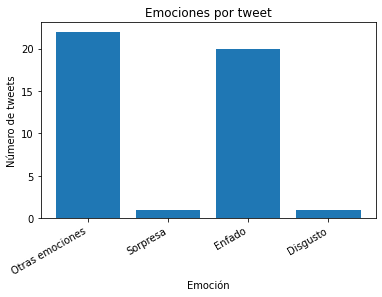

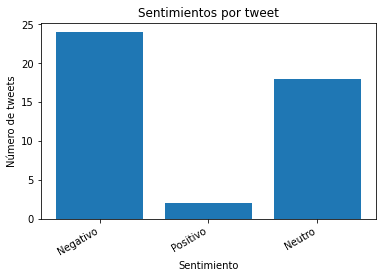

In [ ]:

import matplotlib.pyplot as plt


display('El sentimiento predominante en el tweet objetivo es: '+sentiments_es[target_tweet_main_sentiment]+' ('+str(target_predominand_sent)+')')
display('La emoción predominante en el tweet objetivo es: '+emotions_es[target_tweet_main_emotion]+' ('+str(target_predominand_emot)+')')
print('\n\n')


#Remove items with count 0
sentiments_counter_copy = delete_none(sentiments_counter.copy())
emotions_counter_copy = delete_none(emotions_counter.copy())

# now we will print the emotions and sentiments
###print(emotions_counter)
###print(sentiments_counter)

# now we will plot the graph we will create a figure
# this is for emotions
fig1,ax1=plt.subplots()
ax1.bar(emotions_counter_copy.keys(),emotions_counter_copy.values())
ax1.set_title('Emociones por tweet')
ax1.set_xlabel('Emoción')
ax1.set_ylabel('Número de tweets')
fig1.autofmt_xdate()# to make the words inclined

# this is for sentiments
fig2,ax2=plt.subplots()
ax2.bar(sentiments_counter_copy.keys(),sentiments_counter_copy.values())
ax2.set_title('Sentimientos por tweet')
ax2.set_xlabel('Sentimiento')
ax2.set_ylabel('Número de tweets')
fig2.autofmt_xdate()# to make the words inclined

# will show the plot
plt.show()

In [ ]:
print(STOP)

In [ ]:
################################################################
# Method that generate Stance detection training file for cumbre vieja
################################################################
def generate_stance_detection_file(tweets_dataframe, current_target_text):
    i_less_one_tweet = ''
    only_fakes_threshold = 0.55

    tweets_dataframe_stance = tweets_dataframe.copy()

    tweets_dataframe_stance['Target'] = 'Megatsuname Cumbre Vieja'
    tweets_dataframe_stance['Stance'] = 'AGAINST'

    #################################################
    #
    for index, row in tweets_dataframe_stance.iterrows():
        i_less_one_tweet = row.text

        #TODO:calc score between tweets
        #Generate embedding
        i_target_tweet_embedding = model.encode(current_target_text)
        i_less_one_embedding = model.encode(i_less_one_tweet)

        #score calc
        cosine_scores_1 = util.pytorch_cos_sim(i_target_tweet_embedding, i_less_one_embedding)

        #Assign the new value
        ##cosine_scores[0][index] = cosine_scores_1[0][0]
        tweets_dataframe_stance.loc[index, "cosine_scores"] = float(cosine_scores_1[0][0])

        if tweets_dataframe_stance.loc[index, "cosine_scores"] > only_fakes_threshold:
          tweets_dataframe_stance.loc[index, 'Stance'] = 'FAVOR'
    #end_for

	  #Copy dataframe sorted by score
    ##df_aux = tweets_dataframe_stance.sort_values('cosine_scores', ascending=False, inplace=False)
    tweets_dataframe_stance.to_csv(BASE_FOLDER+'202125_tweets_StanceDetectionTraining.txt', index=False)
    
#end_method

In [ ]:
generate_stance_detection_file(local_df_final, my_selected_tweet_full)